# Data Science Engineering Methods and Tools

# Assignment 1 - ML Data Cleaning and Feature Selection
**Name : Divya Unnikrishnan**

**NUID: 001001182**


**Abstract**

Our goal is to explore [California housing dataset](https://www.kaggle.com/camnugent/california-housing-prices) and check the quality. This dataset is a modified version of the California Housing dataset available from Luís Torgo's page (University of Porto).It has information related to the houses found in a  California district and some summary stats about them based on the 1990 census data. Although this dataset will not be helpful in predecting the current housing values, it will serves as an introduction to machine learning. This datasets can be used as regression tasks.
The dataset is not clean. So we will be looking at some data cleaning techniques.
Also we are not sure which features are relevant. It would be interesting to test some feature selection methods.
We will also be answering a few questions like which independent variables are useful to predict the target,if any variables have missing values,which predictor variables are more important. We will also be seeing which are the independent variables and target variable.


# Exploratory Data Analysis

Before we start performing tasks on the dataset let's first investigate the data and gather insights from it. EDA deals with critical processes before performing initial investigations so as to discover anomilies, test hypothesis and check assumptions with the help of visulaizations incluing graphs and plots.

**1.Importing Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#importing necessary Python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

# Set the aesthetic style of the plots.
sns.set_style(style='darkgrid')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**2.Importing Dataset**

Using Pandas library to load files 

In [ ]:
link = 'https://raw.githubusercontent.com/divyaunnk/Divya_Unnikrishnan_DS/main/housing.csv'
housing_df= pd.read_csv(link)


Printing first 5 rows of the csv

In [ ]:
housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_df.shape

(20640, 10)

There are 20640 rows and 10 columns.

**3.  Exploring the dataset**

  **3.1 Check the information about data and data types of each attributes**

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Insights:**
  - The above output provides the information about each attributes' count of non-null values and the data-type.
  - We can see that total_bedrooms column has less than 20640 non-null values i.e. columns have missing values.
  - We can see that only one attribute "ocean_proximity" is object type, the rest are float64 type.
  


**3.2 Checking Unique Values**

In [ ]:
housing_df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [ ]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

The above table represents the number of unique values in each feature. For example the feature ocean_proximity has 5 unique values.

**3.3 Check the number of null values**

In [ ]:
housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Insights:**

 - The above column represents the number of null values in each feature.

 - 'total_bedroom' feature has 207 null values



**4. EDA Statistical Analysis**



   **4.1 Measure of central tendency**

   To represent the dataset in 1 number values, we use the measure of central tendency. It is the measure of very basic but useful statistical functions that represent the typical values in dataset.The measures are:
  - Mean
  - Median
  - Mode and quantile

**4.2 Check Mean, Median, Mode and Quantiles of the dataset**

**Mean**

It is the average of all values in a column.

In [ ]:
housing_df.mean()

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

**Median**

It is the middle value of the volumn when the data is arranged in ascending order.

In [ ]:
housing_df.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

**Mode**

It is the value that appears the most number of times in the column.

In [ ]:
housing_df.mode()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.31,34.06,52.0,1527.0,280.0,891.0,306.0,3.1250,500001.0,<1H OCEAN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0001,NaN,NaN


**Insights:**

median_income has two values which appear the most number of times whereas the rest of the columns have only one mode. The rest of the values in the second row are NaN.

**4.3. Check data description**

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Insights**
  - It generates the descriptive statistics for the data
  - Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
  - Describe function returns summary for numerical columns by default which indicates ocean_proximity is a categorical column
  - 25,50 and 75 indicates quantile ranges.For median_house_value,  119600.000000lies below the 25th quantile and 264725.000000 is below 75th quantile.
  - 50% is equal to median.total_bedroom has a median of 2127.000000.
  - housing_median_age has a min of 1 and a max 52.


**4.4 Measure of Dispersion**

Measures of dispersion describe the spread of the data. The measures of dispersion are range, IQR, Variance, and Standard Deviation

**Interquartile range**

It is the boundry between the first quartile Q1 and the third quartile Q3

In [ ]:
housing_df.quantile(q=0.75) - housing_df.quantile(q=0.25)

longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           351.00000
population               938.00000
households               325.00000
median_income              2.17985
median_house_value    145125.00000
dtype: float64

For example, in total_rooms there are 1700.25000 points which lie in the interquartile range

**Range**

It is the difference between the highest value and the lowest value for each feature

In [ ]:
housing_df.drop('ocean_proximity',1).max() - housing_df.drop('ocean_proximity',1).min()

longitude                 10.0400
latitude                   9.4100
housing_median_age        51.0000
total_rooms            39318.0000
total_bedrooms          6444.0000
population             35679.0000
households              6081.0000
median_income             14.5002
median_house_value    485002.0000
dtype: float64

As ocean_proximity is a categorical value, it is not possible to calculate the range as the values will be either a yes or a no.

**Variance**

It measures how far each number in the dataset from the mean

In [ ]:
print(housing_df.var())

longitude             4.014139e+00
latitude              4.562293e+00
housing_median_age    1.583963e+02
total_rooms           4.759445e+06
total_bedrooms        1.775654e+05
population            1.282470e+06
households            1.461760e+05
median_income         3.609323e+00
median_house_value    1.331615e+10
dtype: float64


**Standard Deviation**

Standard deviation is a squared root of the variance to get original values. Low standard deviation indicates data points close to mean.

In [ ]:
housing_df.std()

longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           421.385070
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

median_income has the lowest standard deviation and median_house_value has the highest value

**4.5 Covariance and Correlation**


**Covariance**

It is the measure of how changes in one variable are associated with changes in a second variable.


In [ ]:
housing_df.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014139,-3.957054,-2.728244,1.948037e+02,5.876851e+01,2.263778e+02,4.236807e+01,-0.057765,-1.062743e+04
latitude,-3.957054,4.562293,0.300346,-1.682178e+02,-6.029962e+01,-2.631378e+02,-5.801024e+01,-0.323860,-3.553256e+04
housing_median_age,-2.728244,0.300346,158.396260,-9.919120e+03,-1.700313e+03,-4.222271e+03,-1.457581e+03,-2.846140,1.533988e+05
total_rooms,194.803750,-168.217847,-9919.120060,4.759445e+06,8.567306e+05,2.117613e+06,7.661046e+05,820.852410,3.377289e+07
total_bedrooms,58.768508,-60.299623,-1700.312817,8.567306e+05,1.775654e+05,4.191391e+05,1.578295e+05,-6.180851,2.416878e+06
population,226.377839,-263.137814,-4222.270582,2.117613e+06,4.191391e+05,1.282470e+06,3.928036e+05,10.400979,-3.221249e+06
households,42.368072,-58.010245,-1457.581290,7.661046e+05,1.578295e+05,3.928036e+05,1.461760e+05,9.466667,2.904924e+06
median_income,-0.057765,-0.323860,-2.846140,8.208524e+02,-6.180851e+00,1.040098e+01,9.466667e+00,3.609323,1.508475e+05
median_house_value,-10627.425205,-35532.559074,153398.801329,3.377289e+07,2.416878e+06,-3.221249e+06,2.904924e+06,150847.482793,1.331615e+10


**Insights**

 - Hard to understand and compare because it gives values which are at different scales
 - For better comparison, we should normalize the values that will always be between -1 to +1


**Correlation**

Correlation is a statistical measure that shows the extent to which two variables are linearly related. Correlation does not imply causation. Meaning, it gives relationship between two variables without describing its nature

In [ ]:
housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


**Insights**

 - This gives the correlation coefficient between each pair of attributes.
 - We can see a perfect correlation of 1 across the diagonal as we are finding the correlation with the variable itself
 - Correlation coeffiecint ranges between -1 and +1 
 - longitude and latitude has a very strong negative correlation which means when one value increases, the other decreases
 - households and median_income has a very low correlation meaning these variables are independent of each other.
 - median_income and median_house_value has the highest correlation which means they are strongly related.

**4.6 Pairwise relationship in the dataset (Bivariate Analysis)**



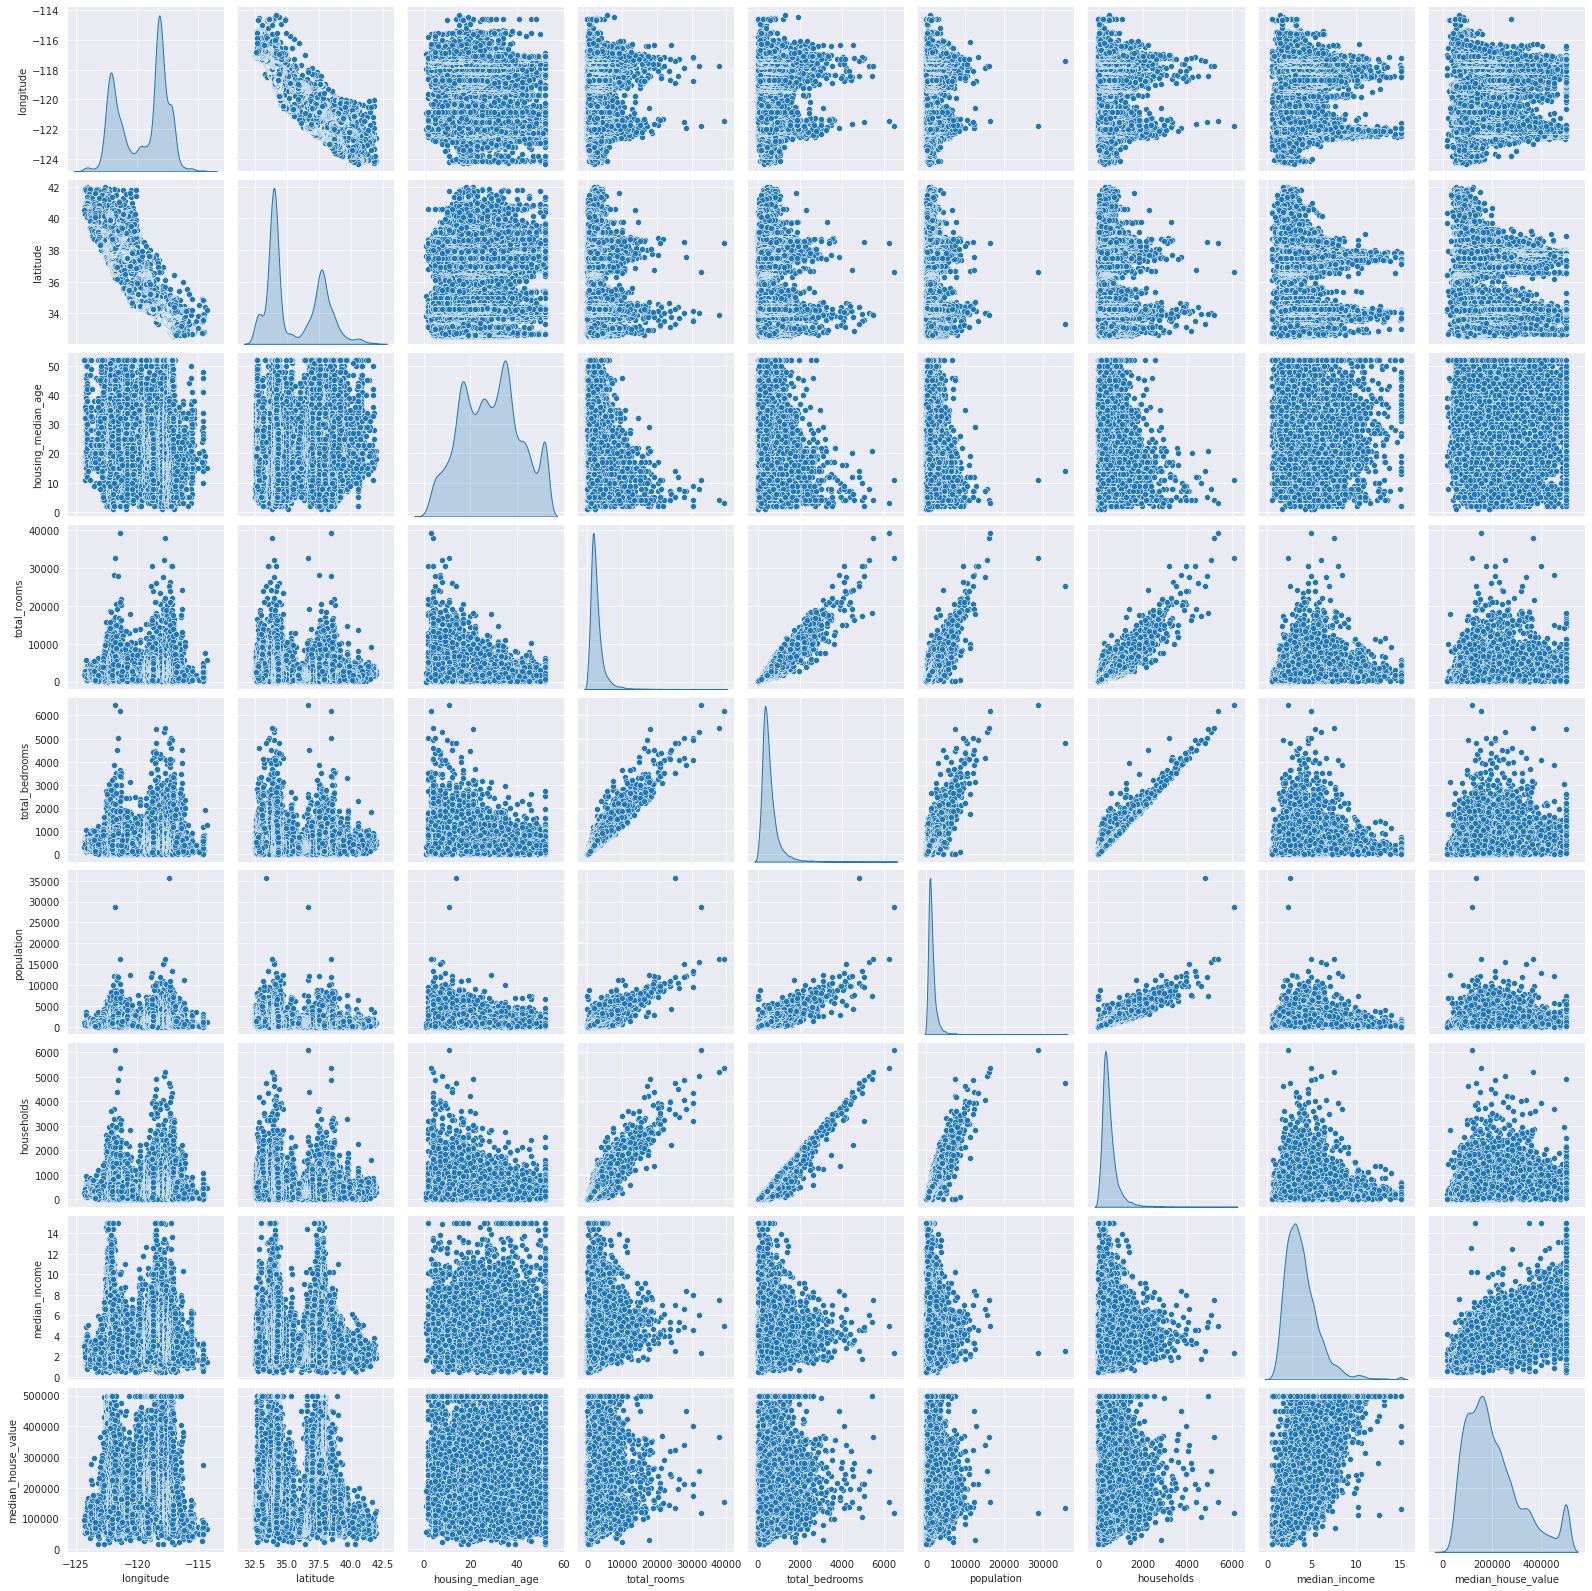

In [ ]:
sns.pairplot(housing_df, diag_kind='kde')
plt.show()

**Insights:**
  - It plots the pairwise distribution of all variables
  - Here the x axis represents the row name and the y axis represents the y axis.
  - The diagonal axes are treated differently. It represents the univariate distribution of the data of the variable in that column
  - We can see that housing_median_age is negatively correlated to population. Similarly lattitude and longitude are negatively correlated.
  - Consider the graph of total rooms vs total bedrooms and the graph of total_bedrooms vs total_rooms. We can see that the graphs are inverted on the axis. Same applies for other graphs also.
  - We can also see that the variable median_house_value and housing_median_age are independent of each other. Meaning a change in median_house_value does not have a significant change in housing_median_age

**4.7 Heatmap of correlation**

**Plotting Pearson's Correlation heatmap**

Formula of Pearson's Correlation Coefficient is given as : the ratio of Covariance between two variables and the product of their standard deviation

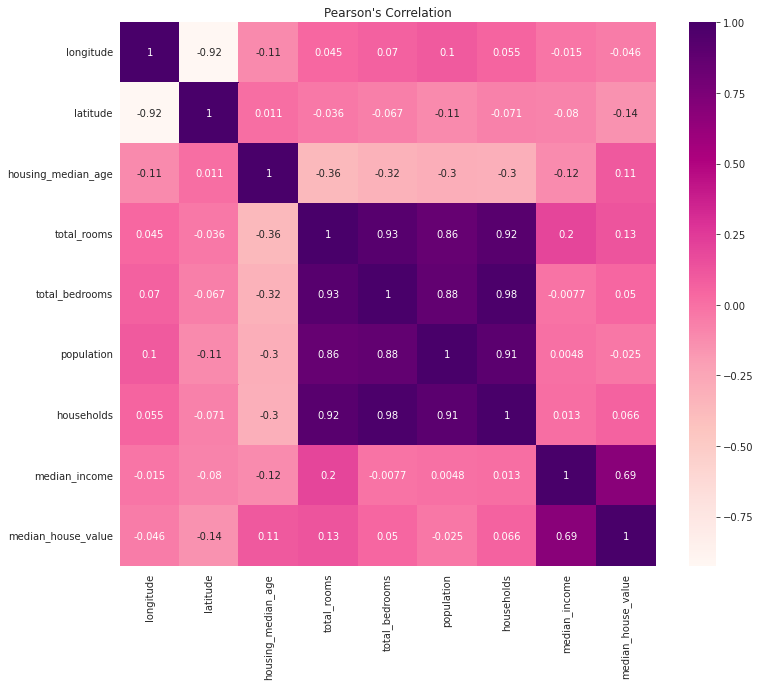

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(housing_df.corr(), annot=True , cmap="RdPu")
plt.title("Pearson's Correlation")
plt.show()

**Insights:** 
  - Plot of the heatmap is a graphical representation of data using colors to visualize the value of the matrix.
  - We can see our independent variable median_income has a correlation coefficient which is closest to 1. This means that out of all the independent variables, only median_income is closely related to the target variable median_house_value. 
  - The variables like households, total_bedroom, total_room with correlation value closer to 0 mean they have a weak relation with the target variable.
  - We can find the relation between the different independent variables. For example, there is a high positive correlation between total_rooms and total_bedrooms. However the relation between household and median income is closer to 0 which indicates a weak realtionship 
  - Perason's correlation coefficient is the covariance of the two variables divided by the product of the standard deviation of each data sample.

**Plotting Spearman's Correlation Coefficient**

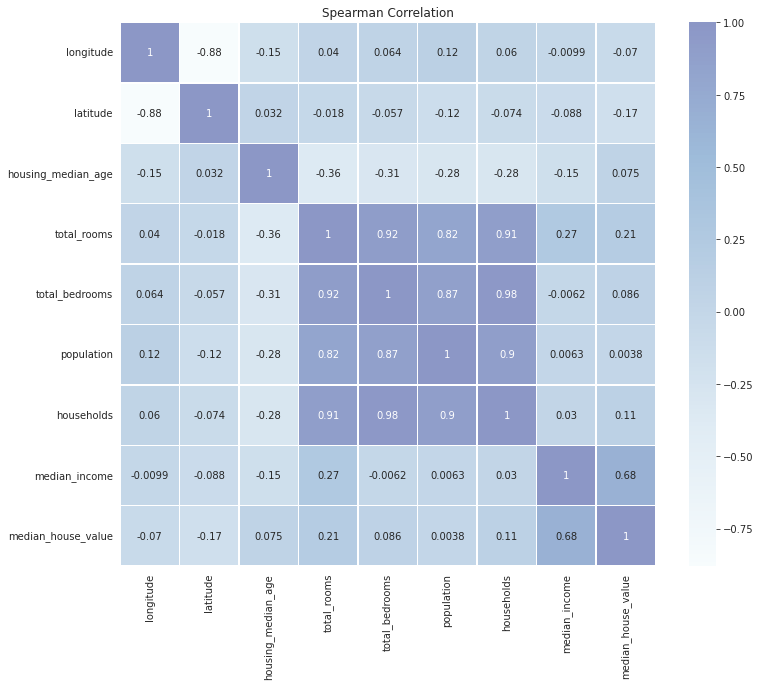

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(housing_df.corr(method='spearman'), annot=True, cmap="BuPu", linewidths=.5, center=1)
plt.title("Spearman Correlation")
plt.show()

**Insights**
 - Spearman's Rank correlation coefficient is used to find the monotonic relation between variables. Monotonic relationship is the one where:
  - as one variable value increases, the value of the other variable also increases
  - as one variable value decreases, the value of the other variable increases

 - But this change does not happen at a constant rate

 - Formula of Spearman Rank is given as the :
Pearson's correlation coeffiecient between the rank variables

**4.8 Checking distribution of each variable using boxplot**

**Univariate Analysis**

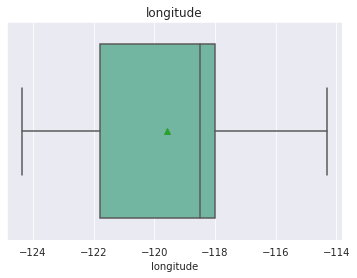

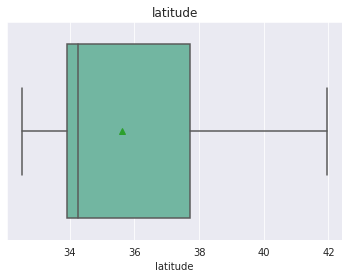

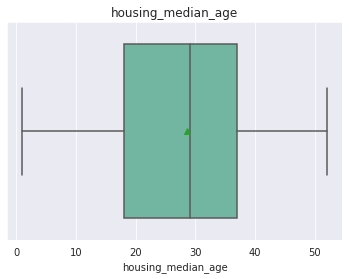

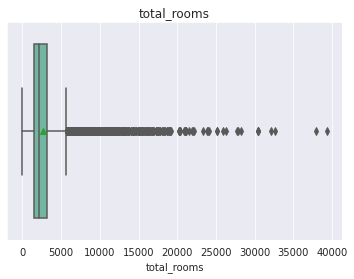

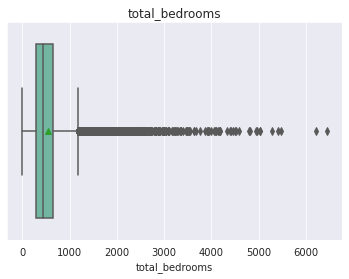

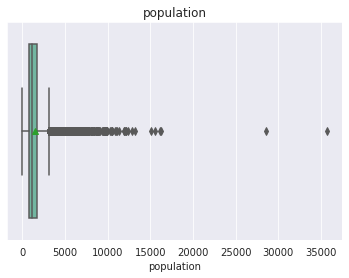

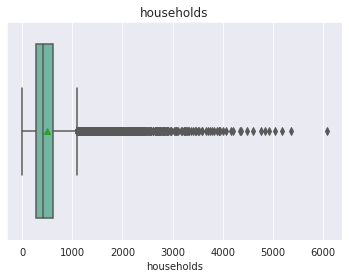

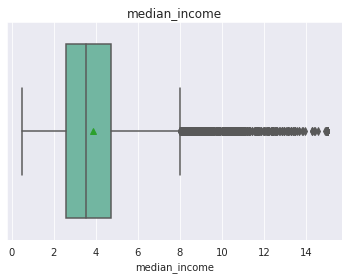

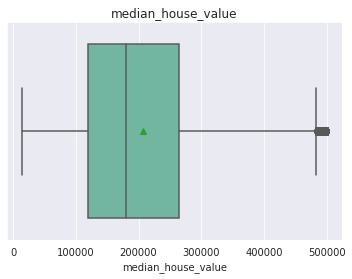

In [ ]:
	for i, col in enumerate(housing_df.drop('ocean_proximity',1).columns):
		plt.figure(i)
		plt.title(col)
		sns.boxplot(housing_df[col], orient="h", showmeans=True , palette="Set2")

**Insights**

  - You can find the distribution skewness of the data by looking at the position of the median 
  - In the boxplot of latitude, the mean is less than the median. This indicates that the data is left skewed.
  - In the boxplot of longitude, the mean is greater than the median indicating distribution is right skewed.
  - The boxplot of population is empty as it has null values
  - households has a very large number of outliers which means the range of the column is not proper
  - median_house_value has less number of outliers which means the range of the column makes sense.

**5 Data Preprocessing**

**5.1 Imputing the null values**

**Replacing null values with the mode of the column**

In [ ]:
housing_df['total_bedrooms']=housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].mode().iloc[0])
housing_df['total_bedrooms']

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

**Insights:**

 - As outlier points will have a significant impact on the mean, it is recommended to use the median or mode.

 - The column deals with number of bedrooms, hence it is better to replace it with mode rather than the mode 

**5.2 Creating Dummy variables**

In [ ]:
housing_df=pd.get_dummies(housing_df,columns=['ocean_proximity'], drop_first=True)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


**Insights:**
 - After performing One hot Encoding, we can see that for the n unique values in the categorical column,n-1 rows have been created.
 - For ocean_proximity, there were 5 unique values as seen before, hence 4 new columns have been created where 1 represents a type of category is present and 0 for the other categories.
 - These new columns are equivalent to 'Is the house near the bay?' or 'Is the house near the ocean?' These will be used as independent variables without imposing any kind of ordering between the categories
 

**5.3 Normalization of Data**

In [ ]:
x= housing_df[['median_house_value','total_rooms', 'longitude', 'households','latitude', 'housing_median_age', 'total_bedrooms','population','median_income']].values.astype(float)

x_scaled=preprocessing.MinMaxScaler().fit_transform(x)

housing_df[['median_house_value','total_rooms', 'longitude', 'latitude', 'households' ,'housing_median_age', 'total_bedrooms','population','median_income']] = pd.DataFrame(x_scaled)

In [ ]:
housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.020556,0.784314,0.022331,0.019863,0.008941,0.567481,0.539668,0.902266,0,0,1,0
1,0.212151,0.186976,0.392157,0.180503,0.171477,0.067210,0.565356,0.538027,0.708247,0,0,1,0
2,0.210159,0.028943,1.000000,0.037260,0.029330,0.013818,0.564293,0.466028,0.695051,0,0,1,0
3,0.209163,0.035849,1.000000,0.032352,0.036313,0.015555,0.564293,0.354699,0.672783,0,0,1,0
4,0.209163,0.042427,1.000000,0.041330,0.043296,0.015752,0.564293,0.230776,0.674638,0,0,1,0


**Insights:**

 - Normalization is used to bring every column to a commonscale without changing the difference in range  
 - From the above table, we can see that the values of all the columns have been scaled into the range of 0 to 1.
 - MinMaxScaler subtracts the minimum value in the feature and then divides by the range. 

**Ordinary Least Squares OLS**

In [ ]:
ols_model = sm.OLS(housing_df['median_house_value'], housing_df[['total_rooms', 'longitude', 'latitude', 'housing_median_age', 'total_bedrooms','population',
       'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND','ocean_proximity_NEAR BAY' ,'ocean_proximity_NEAR OCEAN']]).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_house_value   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                          1.719e+04
Date:                Wed, 13 Oct 2021   Prob (F-statistic):                        0.00
Time:                        18:49:34   Log-Likelihood:                          10603.
No. Observations:               20640   AIC:                                 -2.118e+04
Df Residuals:                   20629   BIC:                                 -2.110e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
total_rooms                   -0.7401      0.061    -12.057      0.000      -0.860      -0.620
longitude                      0.0143      0.005      2.913      0.004       0.005       0.024
latitude                       1.3421      0.083     16.257      0.000       1.180       1.504
housing_median_age             0.1674      0.004     44.557      0.000       0.160       0.175
total_bedrooms                 0.9039      0.077     11.805      0.000       0.754       1.054
population                    -2.6589      0.079    -33.513      0.000      -2.814      -2.503
median_income                  1.2800      0.008    151.384      0.000       1.263       1.297
ocean_proximity_INLAND        -0.1208      0.002    -54.506      0.000      -0.125      -0.116
ocean_proximity_ISLAND         0.3704      0.065      5.716      0.000       0.243       0.497
ocean_proximity_NEAR BAY       0.0148      0.004      3.856      0.000       0.007       0.022
ocean_proximity_NEAR OCEAN     0.0376      0.003     11.928      0.000       0.031       0.044
==============================================================================
Omnibus:                     4656.238   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16918.033
Skew:                           1.104   Prob(JB):                         0.00
Kurtosis:                       6.847   Cond. No.                         99.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Insights:**
 - We can see that the p-value for all the features are below 0.05, which means that the features has greater evidence against the null hypothesis and it is a significant feature.



**6 Splitting Data**

In [ ]:
# Dependent Variable
y= housing_df[['median_house_value']]
# Independent Variable and dropping dependent variable
X = housing_df.drop(['median_house_value'], axis=1)

Insights:
 - Isolating the dependent variable as y which is the median_house_value
 - X is a vector of independent variable

**6.1 Splitting the data into training and testing**


In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=2)
X_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,0.473871,0.080933,0.543125,0.066131,0.082123,0.038799,0.330841,0.234279,0.318798,0.000242,0.113614,0.125484
std,0.198964,0.060635,0.245825,0.052065,0.062825,0.028659,0.225636,0.132820,0.466067,0.015564,0.317381,0.331308
min,0.004980,0.000000,0.019608,0.000000,0.000000,0.000084,0.002125,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251992,0.045716,0.333333,0.037050,0.045313,0.021890,0.149841,0.143008,0.000000,0.000000,0.000000,0.000000
50%,0.578187,0.066930,0.549020,0.054899,0.066884,0.032400,0.184378,0.210970,0.000000,0.000000,0.000000,0.000000
75%,0.631474,0.098051,0.705882,0.079124,0.099317,0.047066,0.550478,0.296725,1.000000,0.000000,0.000000,0.000000
max,0.984064,0.810557,1.000000,0.708785,0.840782,0.335015,0.988310,1.000000,1.000000,1.000000,1.000000,1.000000


**Insights:**
 - Here I have split the dataset in the ratio of 67:33 i.e. our training set is 67% of the dataset and the remaining 33% is our testing set.
 - This splitting is randomized so it doesnt take the top 33%. I have set the random state as 2 to ensure that the random numbers generated are consistent everytime 

**6.2 Creating distributions of predictor variables**

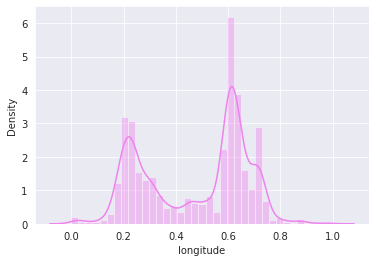

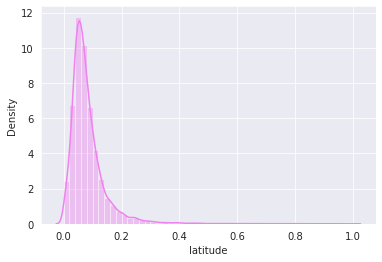

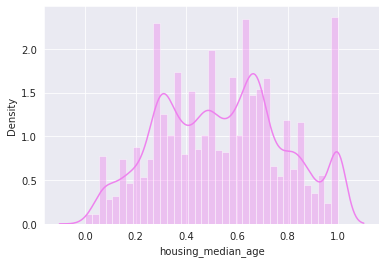

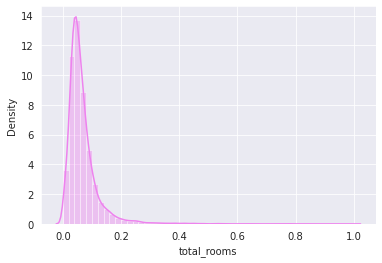

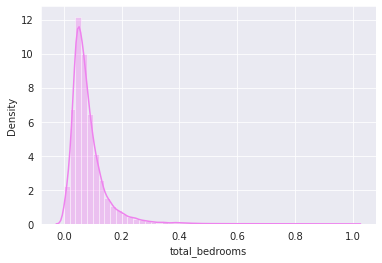

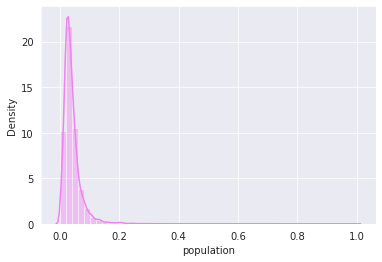

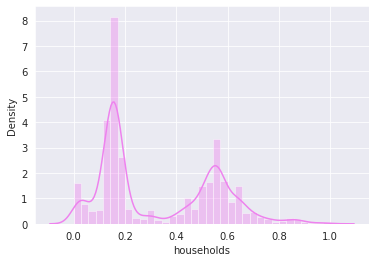

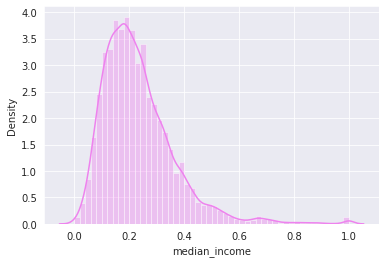

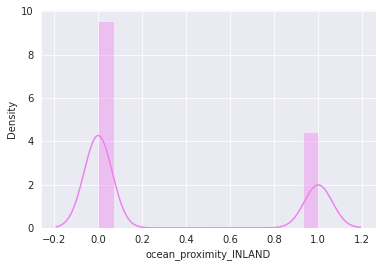

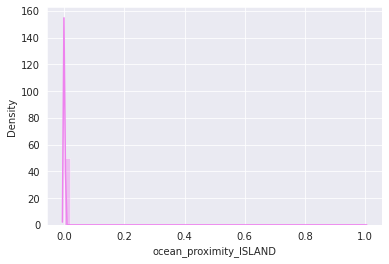

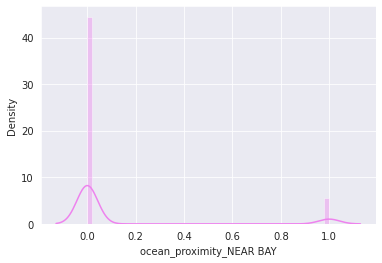

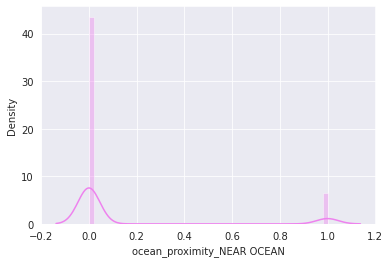

In [ ]:
for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.distplot(X[col],color="violet")

**Insights:**
 - Distplots refer to the relationship between the observations and their probability
 - From the plot of households, we can see that the graph is right skewed. There are no visible outliers.
 - For the graph of median_housing_age, we can see multiple peaks which means that it is a multimodal distribution i.e. not having a normal distribution.
 - For the graphs of categorical columns 
    - ocean_proximity_INLAND, we can see two peaks that indicate  
     - 0 if the house does not have inland ocean proximity 
     - 1 if the house has inland ocean proximity

    - ocean_proximity_NEAR OCEAN we can see a higher peak at 0 indicating less number of houses are near ocean as the curve at 1 is small.
    - ocean_proximity_ISLAND has only one cruve at 0 indicating there are very less number of houses which are on an island.

**6.3 Do the training and test sets have the same data?**


**Plotting frequency distribution of X_train dataset**

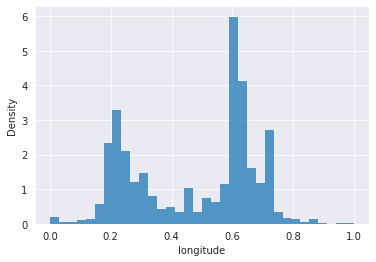

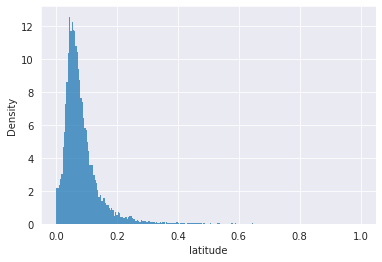

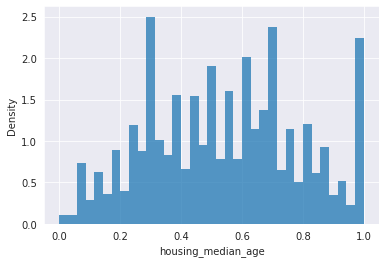

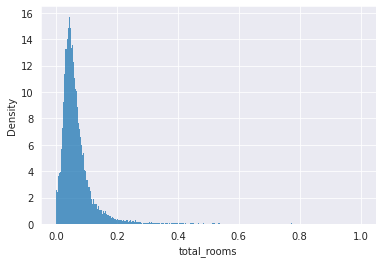

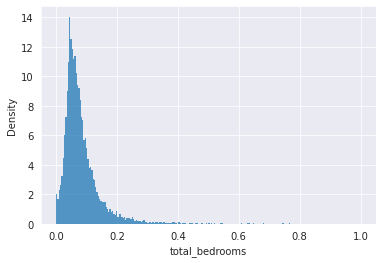

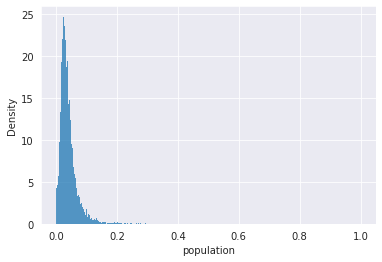

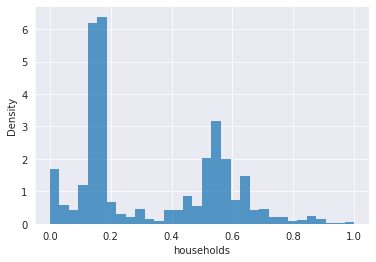

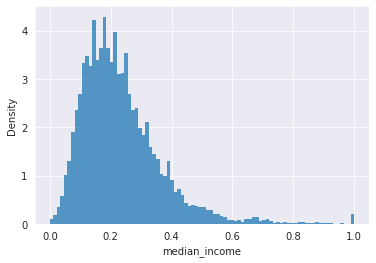

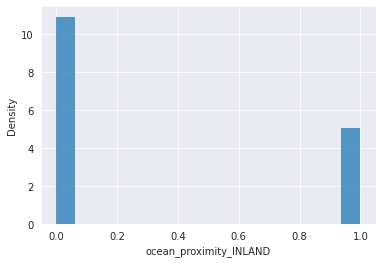

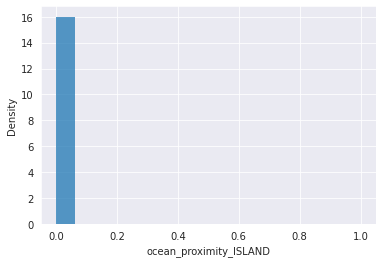

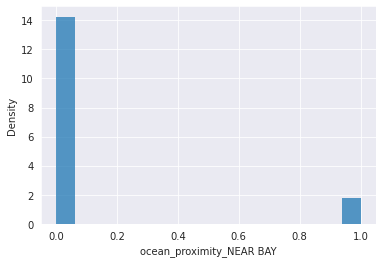

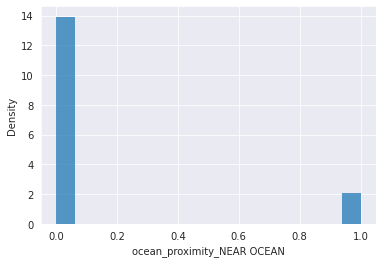

In [ ]:
for i, col in enumerate(X_train.columns):
    plt.figure(i)
    sns.histplot(X_train[col], stat="density", linewidth=0)

**Plotting frequency distribution of X_test dataset**

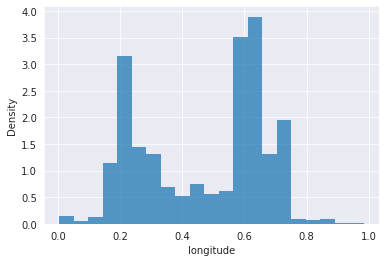

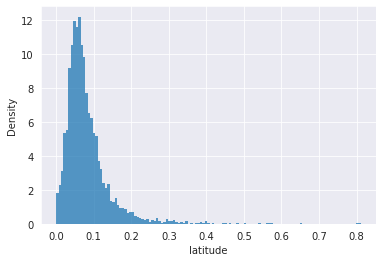

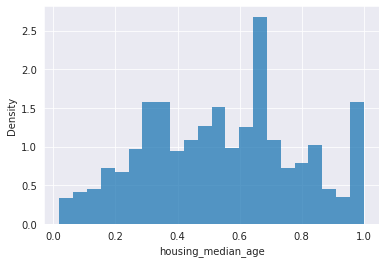

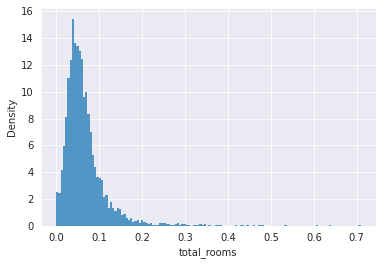

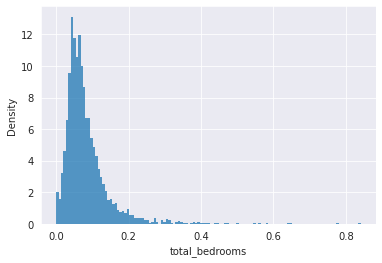

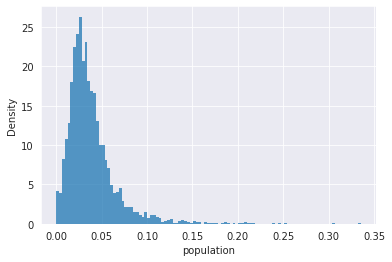

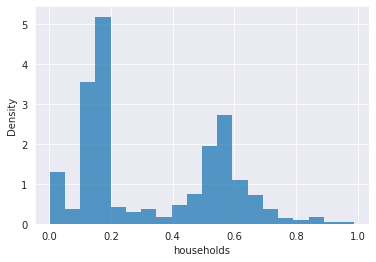

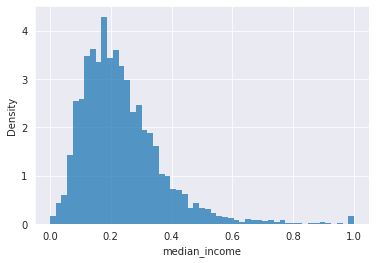

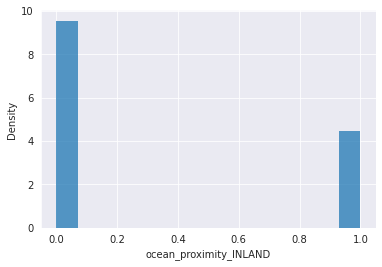

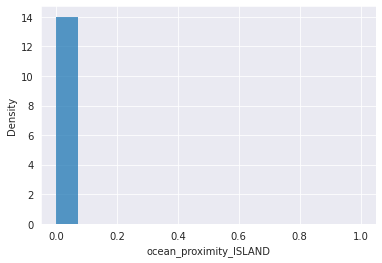

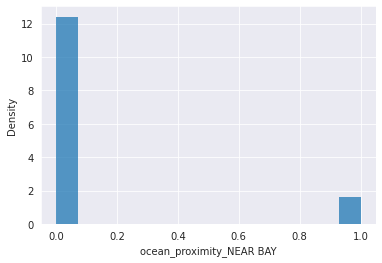

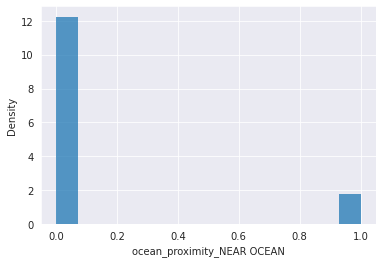

In [ ]:
for i, col in enumerate(X_test.columns):
    plt.figure(i)
    sns.histplot(X_test[col], stat="density", linewidth=0)

**Insights:**
 - From the above histograms, we can infer that the training and testing dataset of the independent variables have different values

**Plotting frequency distribution of y_train dataset**

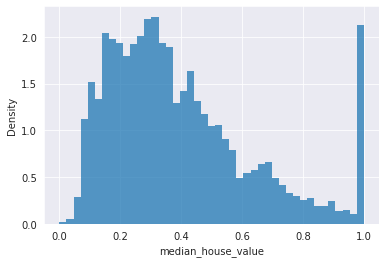

In [ ]:
for i, col in enumerate(y_train.columns):
    plt.figure(i)
    sns.histplot(y_train[col], stat="density", linewidth=0)

**Plotting frequency distribution of y_test dataset**

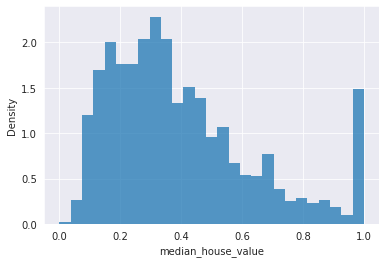

In [ ]:

for i, col in enumerate(y_test.columns):
    plt.figure(i)
    sns.histplot(y_test[col], stat="density", linewidth=0)

From the above frequency distribution graphs we can infer that the test and train dataset of target variables have different values.

**7 Conclusion**

From the above analysis we can answer the following questions:

 - Which independent variables are useful to predict a target (dependent variable)?
  -  Features are significant if p value is less than 0.05 . In the dataset all the features have a p-value which lie below the significance level.
  - This indicates all my independent variable are useful in predicting the target variable

- Which independent variable have missing data? How much? 
   - total_bedrooms has 207 missing data. The other columns do not have any missing values.

- Do the training and test sets have the same data?
  - Based on the histograms of the training and testing dataset of independent and target variable, the distributions are similar but the count of the data is different. This means that they do not have the same data.

- Which the predictor variables independent of all the other predictor variables?
   - From the heatmap we can find the correlation of predictor variable with the other variables.
   - For example, latitude and median_house_age have a correlation of 0.011 which means they do not have a strong relationship.
   - median_income and longitude have a weak negative relationship.
   -This means that the variables are independent of each other.

- Which predictor variables are the most important?
  - p-value and t-value can be used to find the most important predictor variables.
  - median_income has a t-value of 1.2525 with a standard error of 	0.010	and p-value of 0.000. This makes it the most important predictor variable.
  - This can also be seen from the heatmap. median_income has the highest correlation to the target variable of 0.69. This makes it the most significant feature.

- Do the ranges of the predictor variables make sense?
  - The boxplot of latitude,longitude,median_housing_age does not have any outliers which means that the range makes sense.
  - For total_rooms,population,households,median_income the range does not make sense as it has  a lot of outliers.

- What are the distributions of the predictor variables? 
  - This can be seen from the distplots of each variable in the dataset.
  - latitude is left skewed and latitude is right skewed. 
  - The other graphs are not normally distributed and has a lot of outliers.   


**8 References**

1. https://www.kaggle.com/camnugent/california-housing-prices
2. Scikit learn official documentation.
3. Refered towardsdatascience
4. https://github.com/abhi-gm/Machine-Learning-Workshop/blob/main/1_Linear_regression.ipynb

**Kaggle** has been used to take the dataset. Algorithms have been refered from **Sckit learn official documentation**. Exploratory data analysis has been referred from **towardsdatascience**. For OLS and normalization referred github account of TA. The rest of the code has been done independently.

**9 Licencing**

Copyright 2021 Divya Unnikrishnan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.